In [1]:
import os
import pathlib
%load_ext autoreload
%autoreload 2

In [2]:
def is_integer(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [3]:
root = pathlib.Path("/storage/vbutoi/datasets/WMH")
splits = ["training", "test", "additional_annotations"]

all_dirs = []

for split in splits:
    split_path = root / split
    for subdir in split_path.iterdir():
        print(subdir)
        all_dirs.append(subdir)
        for l3_dir in subdir.iterdir():
            if not is_integer(str(l3_dir.name)):
                print(l3_dir)
                all_dirs.append(l3_dir)
                for l4_dir in l3_dir.iterdir():
                    if not is_integer(str(l4_dir.name)):
                        print(l4_dir)
                        all_dirs.append(l4_dir)
                        for l5_dir in l4_dir.iterdir():
                            if not is_integer(str(l5_dir.name)):
                                print(l5_dir)
                                all_dirs.append(l5_dir)

/storage/vbutoi/datasets/WMH/training/Amsterdam
/storage/vbutoi/datasets/WMH/training/Amsterdam/GE3T
/storage/vbutoi/datasets/WMH/training/Singapore
/storage/vbutoi/datasets/WMH/training/Singapore/Siemens3T
/storage/vbutoi/datasets/WMH/training/Utrecht
/storage/vbutoi/datasets/WMH/training/Utrecht/PhillipsAch3T
/storage/vbutoi/datasets/WMH/test/Utrecht
/storage/vbutoi/datasets/WMH/test/Utrecht/PhillipsAch3T
/storage/vbutoi/datasets/WMH/test/Amsterdam
/storage/vbutoi/datasets/WMH/test/Amsterdam/PhillipsIng3T
/storage/vbutoi/datasets/WMH/test/Amsterdam/GE3T
/storage/vbutoi/datasets/WMH/test/Amsterdam/GE1T5
/storage/vbutoi/datasets/WMH/test/Singapore
/storage/vbutoi/datasets/WMH/test/Singapore/Siemens3T
/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3
/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/training
/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/training/Amsterdam
/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/traini

In [4]:
unique_dirs_with_additional = []
for path in all_dirs:
    all_other_dirs = [p for p in all_dirs if p != path]
    is_subdir = False
    for other_path in all_other_dirs:
        if path in other_path.parents:
            is_subdir = True
            break
    if not is_subdir:
        unique_dirs_with_additional.append(path)

In [5]:
unique_dirs_with_additional

[PosixPath('/storage/vbutoi/datasets/WMH/training/Amsterdam/GE3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/training/Singapore/Siemens3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/training/Utrecht/PhillipsAch3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Utrecht/PhillipsAch3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/PhillipsIng3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/GE3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/GE1T5'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Singapore/Siemens3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/training/Amsterdam/GE3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/training/Singapore/Siemens3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/additional_annotations/observer_o3/training/Utrecht/PhillipsAch3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/additional_annotations/observer_o4/training/Amsterdam/GE3T'),
 PosixPath('/stora

In [6]:
unique_dirs = [ud for ud in unique_dirs_with_additional if "additional_annotations" not in str(ud)]

In [7]:
unique_dirs

[PosixPath('/storage/vbutoi/datasets/WMH/training/Amsterdam/GE3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/training/Singapore/Siemens3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/training/Utrecht/PhillipsAch3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Utrecht/PhillipsAch3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/PhillipsIng3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/GE3T'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Amsterdam/GE1T5'),
 PosixPath('/storage/vbutoi/datasets/WMH/test/Singapore/Siemens3T')]

/storage/vbutoi/datasets/WMH/training/Amsterdam/GE3T/100
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)


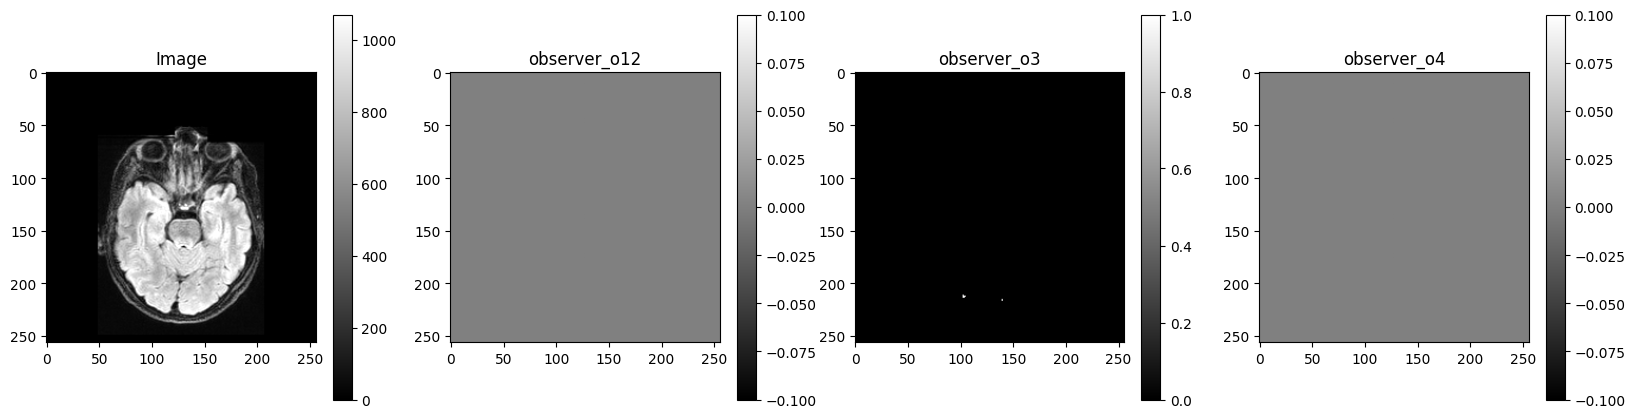

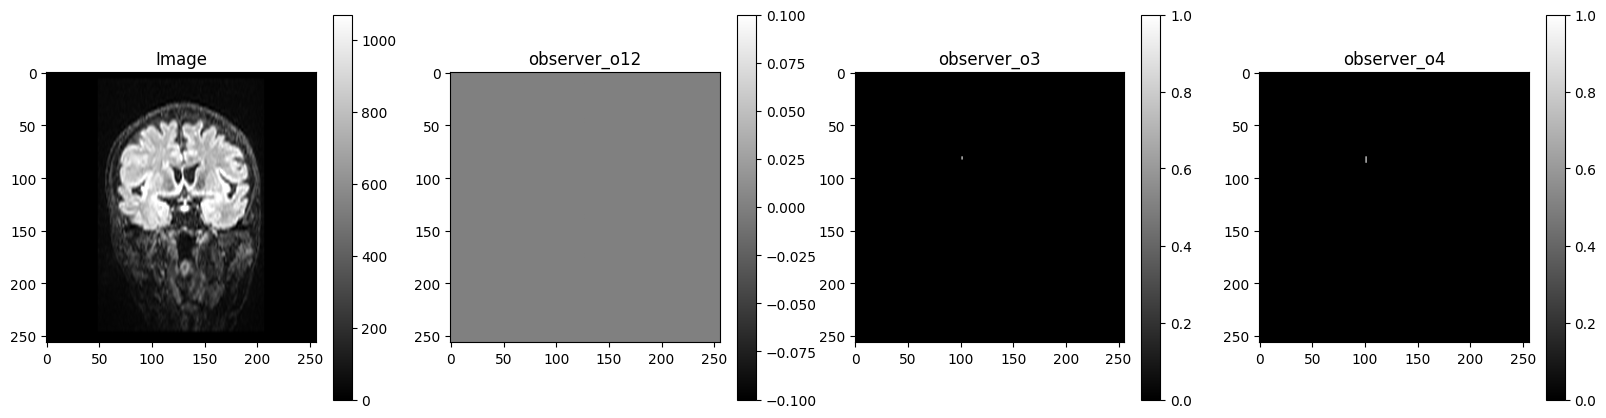

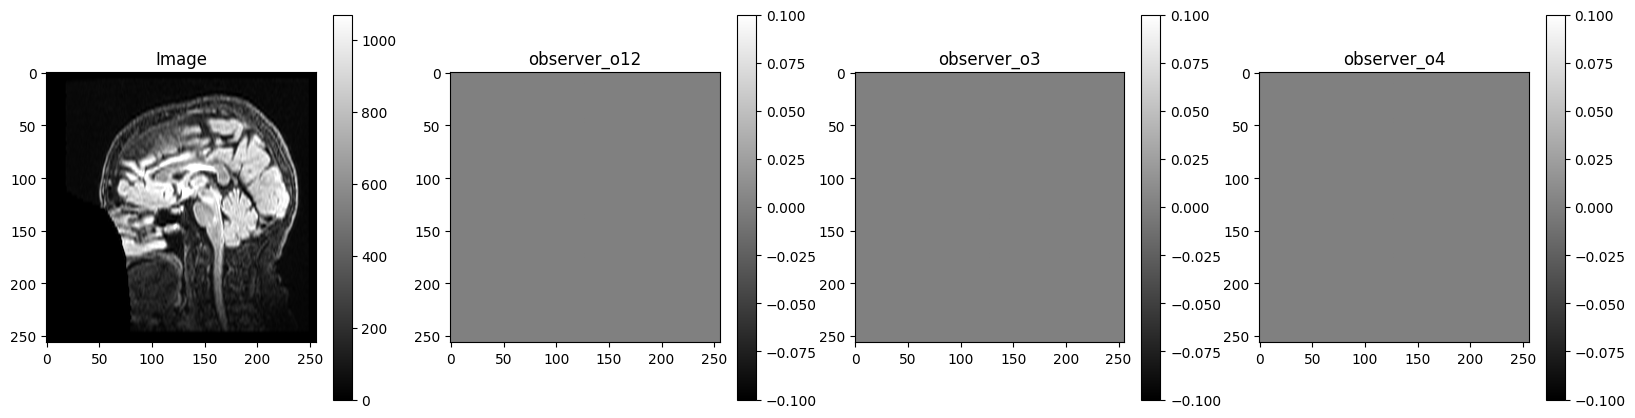

/storage/vbutoi/datasets/WMH/training/Singapore/Siemens3T/67
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)


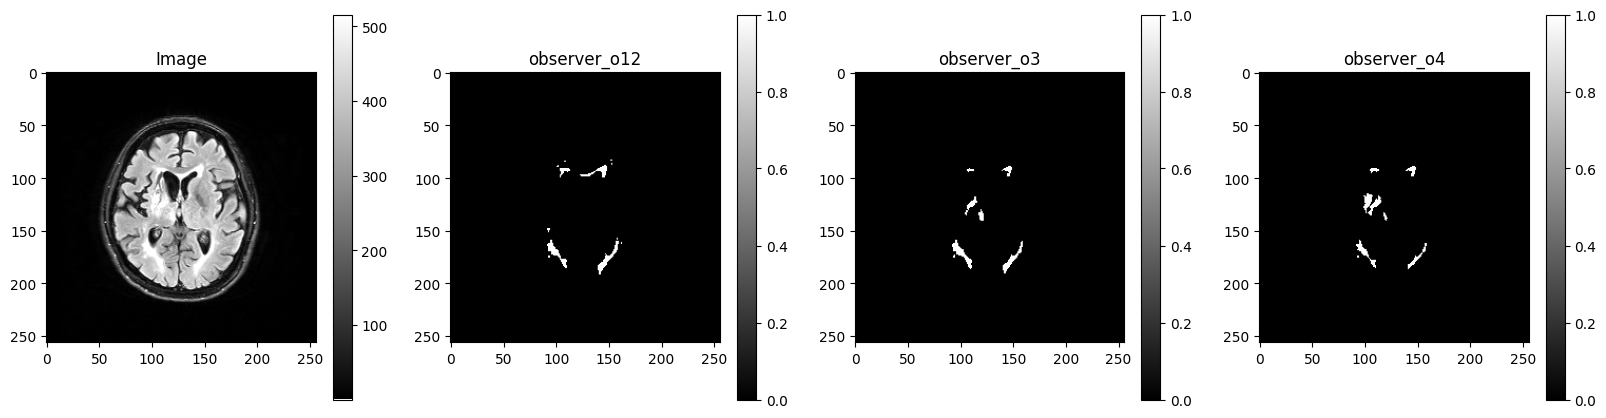

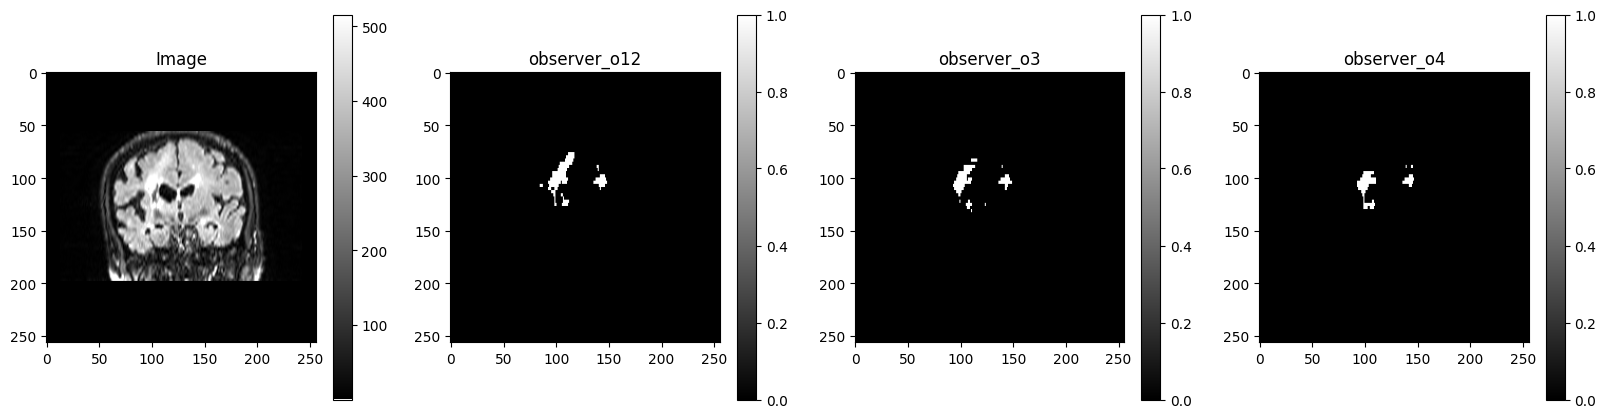

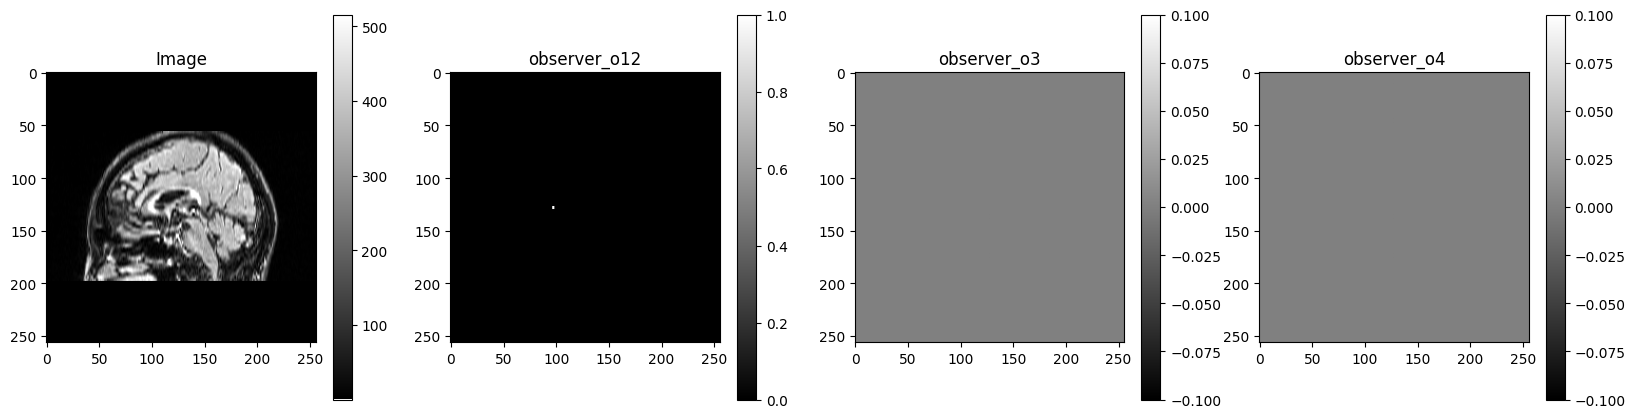

/storage/vbutoi/datasets/WMH/training/Utrecht/PhillipsAch3T/8
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)


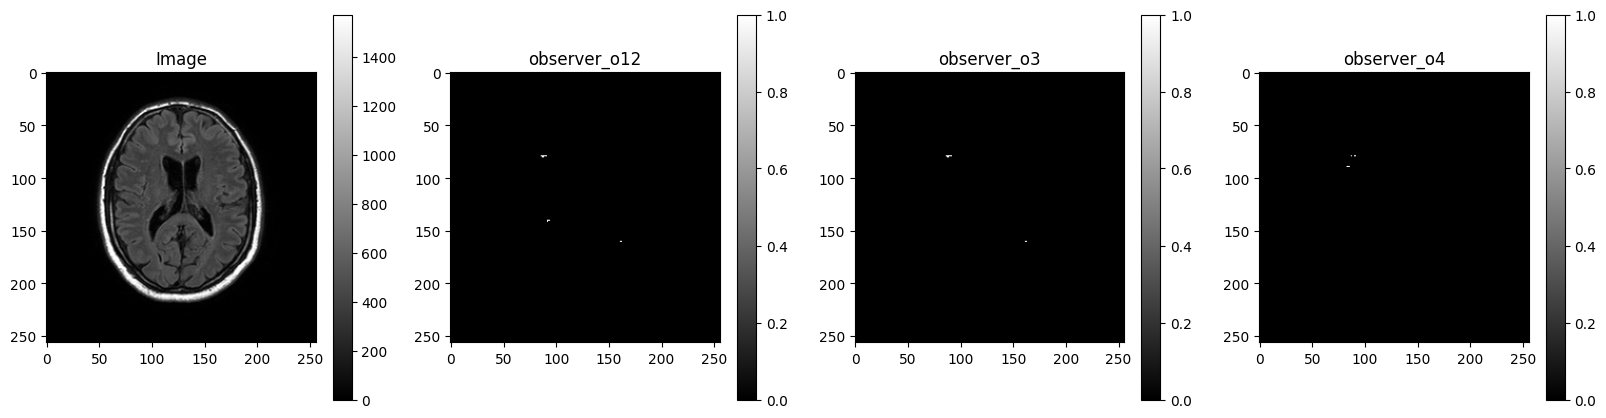

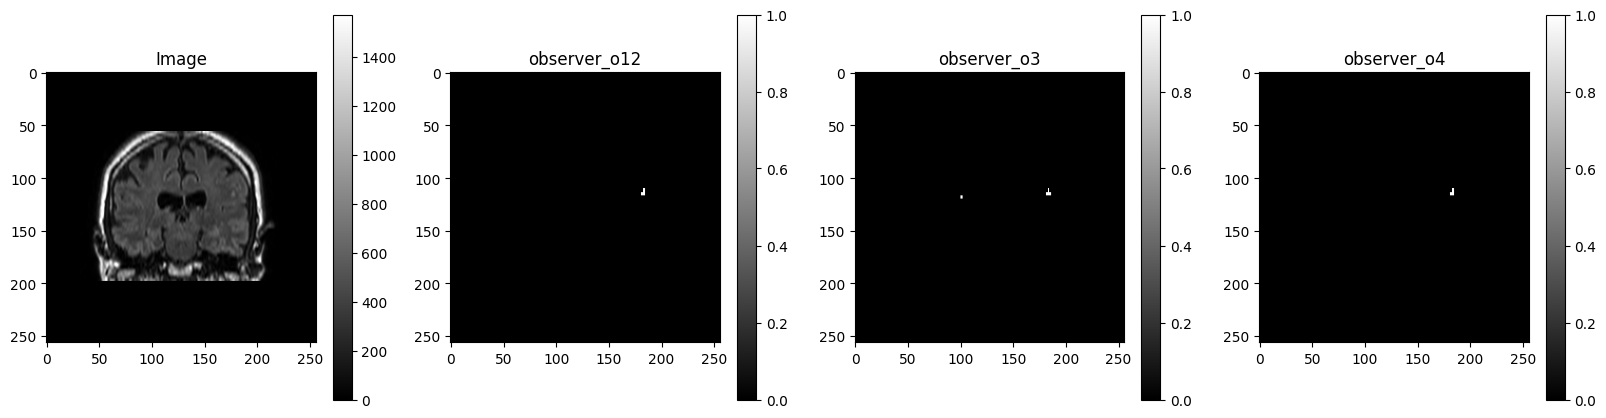

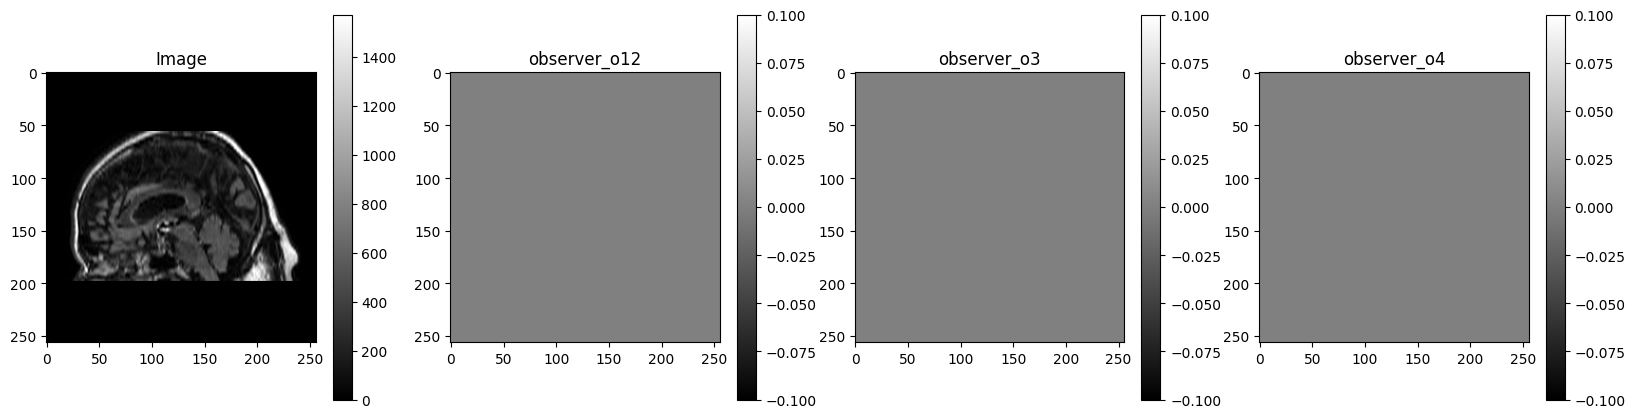

/storage/vbutoi/datasets/WMH/test/Utrecht/PhillipsAch3T/26
(256, 256, 256)
(256, 256, 256)


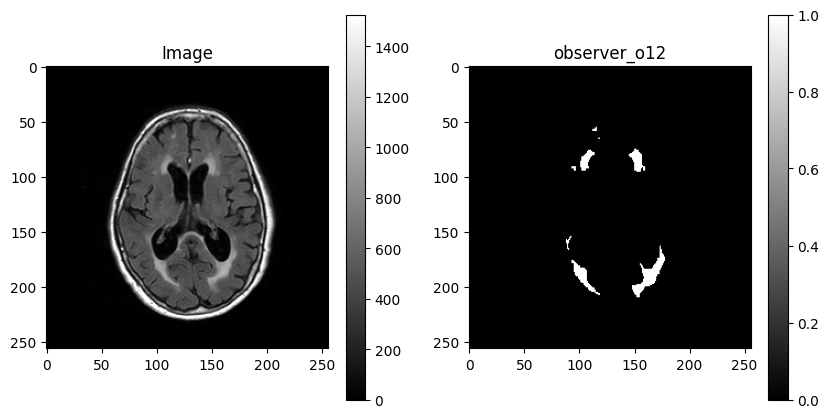

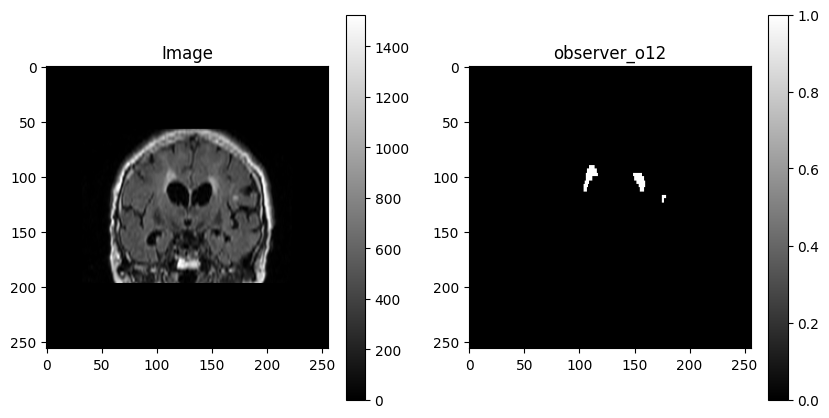

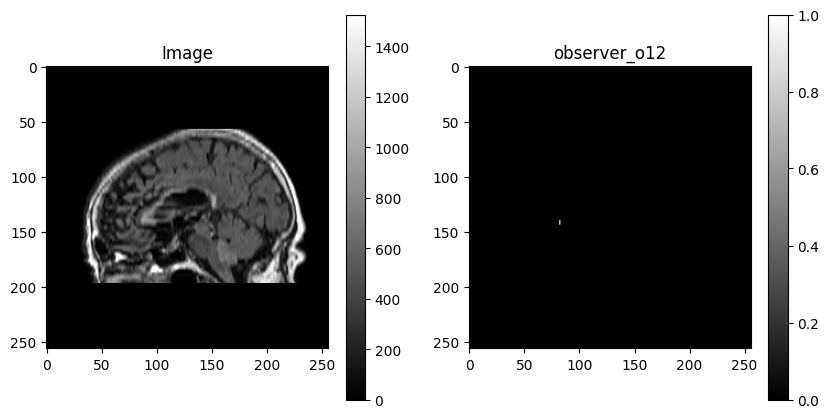

/storage/vbutoi/datasets/WMH/test/Amsterdam/PhillipsIng3T/160
(256, 256, 256)
(256, 256, 256)


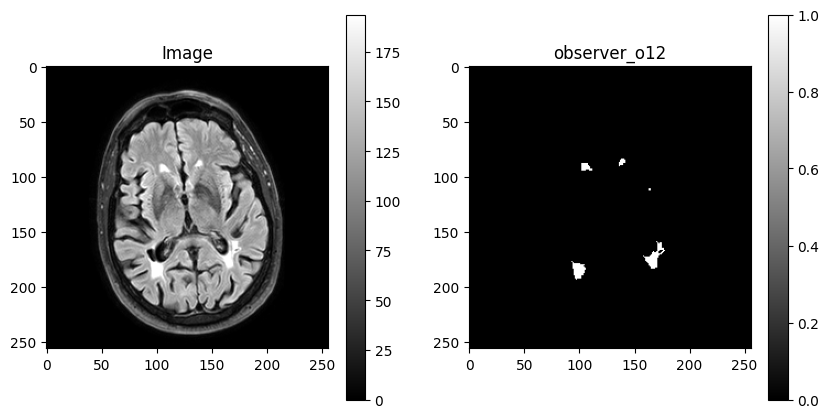

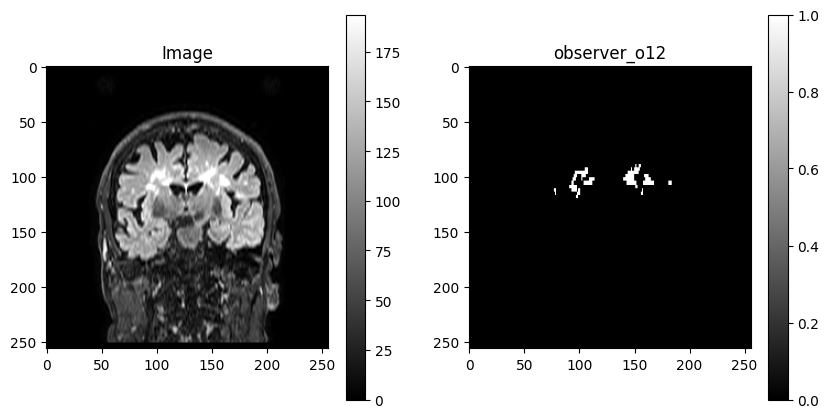

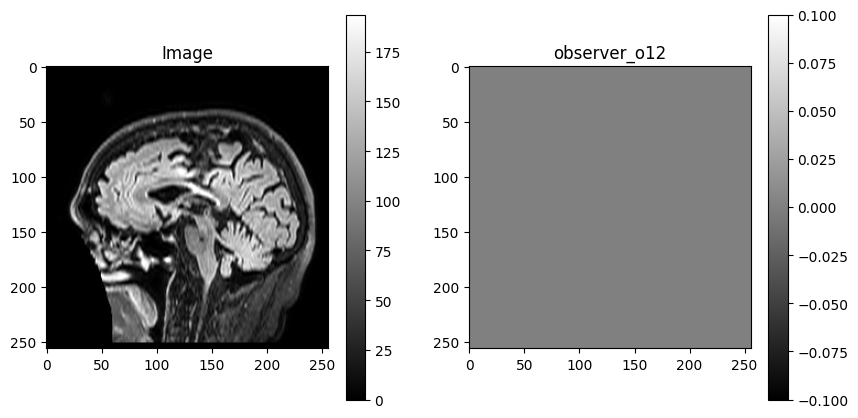

/storage/vbutoi/datasets/WMH/test/Amsterdam/GE3T/136
(256, 256, 256)
(256, 256, 256)


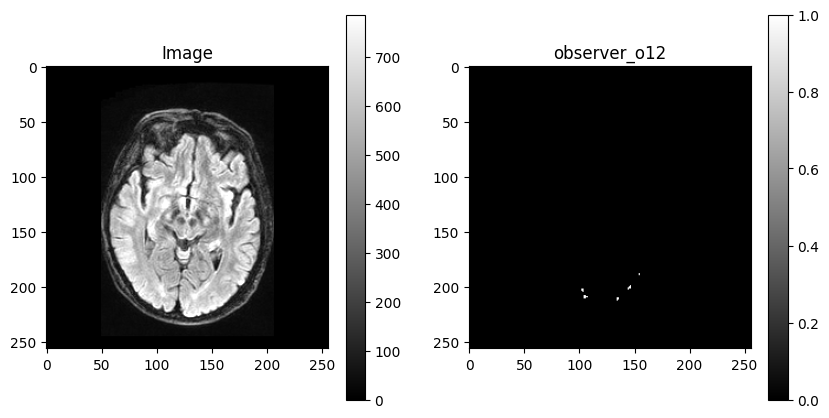

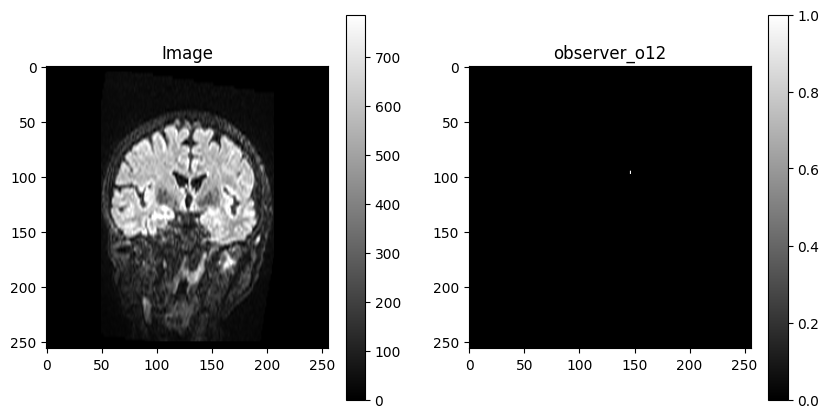

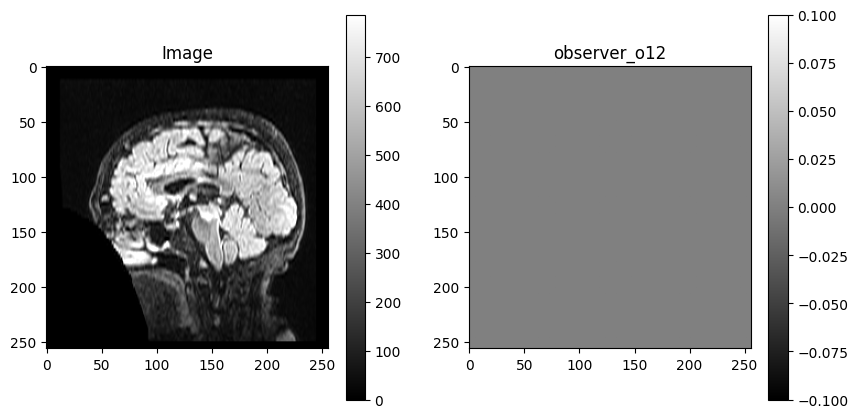

/storage/vbutoi/datasets/WMH/test/Amsterdam/GE1T5/152
(256, 256, 256)
(256, 256, 256)


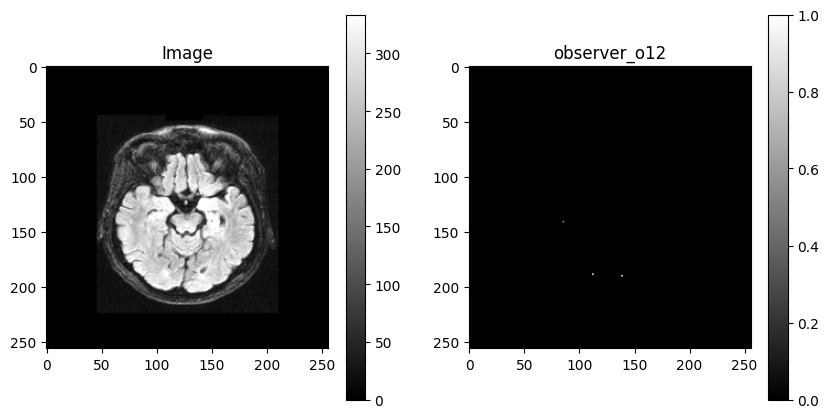

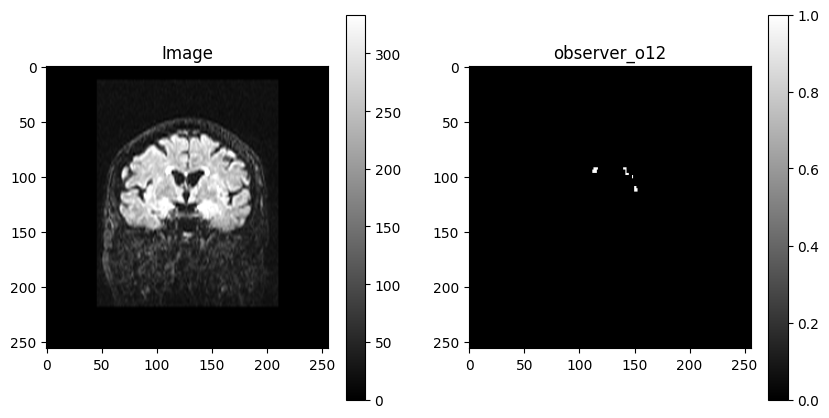

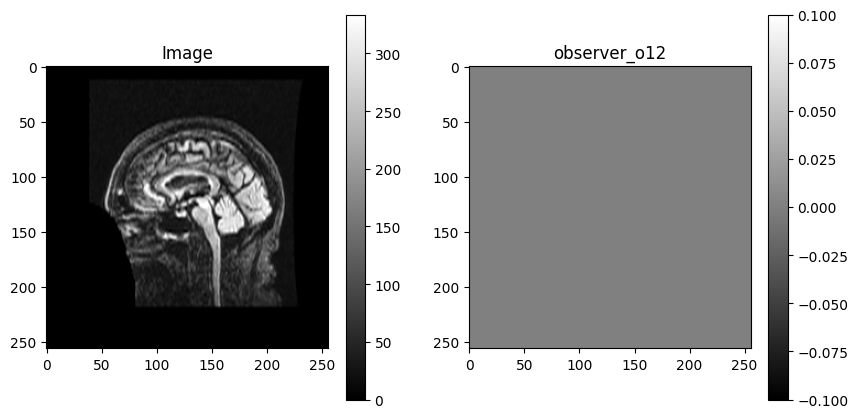

/storage/vbutoi/datasets/WMH/test/Singapore/Siemens3T/87
(256, 256, 256)
(256, 256, 256)


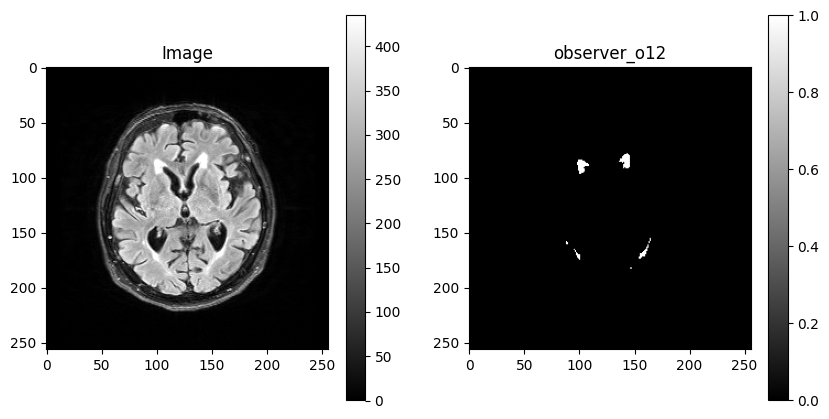

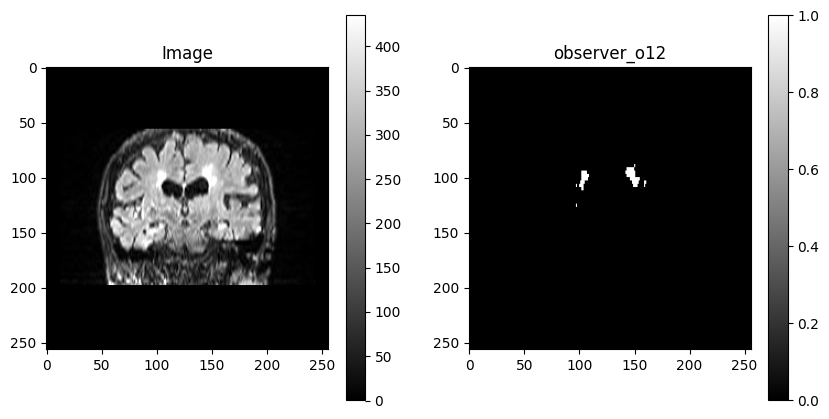

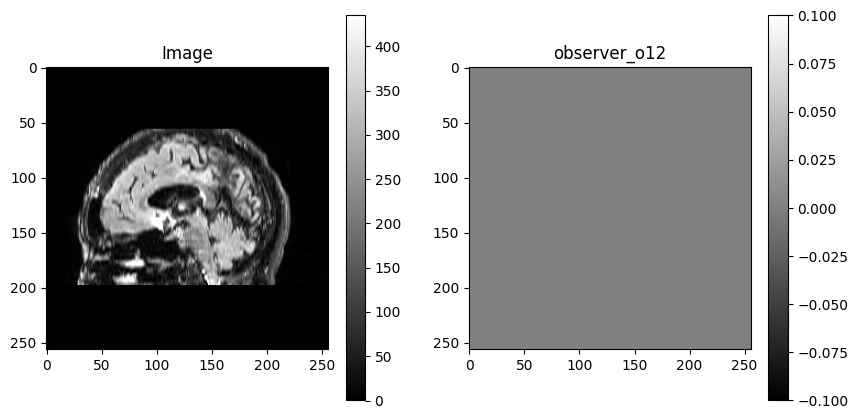

In [8]:
import sys
sys.path.append("/storage/vbutoi/projects/ESE")
sys.path.append("/storage/vbutoi/projects")
sys.path.append("/storage/vbutoi/libraries")
from ese.experiment.datasets.utils.build_wmh import proc_WMH

proc_WMH(
    unique_dirs, 
    show=True,
    save=False
    )